# New evaluation test set playground

this file will be used to test different finetuned models. everytime it is used, please save the results in a different copy and leave this file as clean as possible 

Changes:


In [62]:
import os
import numpy as np
import json
import pandas as pd
from birdnetlib.analyzer import Analyzer
from birdnetlib.batch import DirectoryAnalyzer
import matplotlib.pyplot as plt 
import copy         # deepcopy
import seaborn as sns

## test the model and extract predictions

In [63]:
# E:\Giacomo\Tovanella-20241110T120546Z-001\training_sessions\session_0\test\Certhia familiaris_Eurasian Treecreeper\20200217_160000_591.wav
# salva tutti i risultati su questo array

# 20190603_030000_196_bn.wav
# 20190603_030000_196.wav

complete_pred_segments = {}
def on_analyze_complete(recording):
    # E:\Giacomo\Tovanella-20241110T120546Z-001\test_set_augm\test\Periparus ater_Coal Tit\20200215_090000_88.wav
    audio_name = recording.path.split('\\')[-1]
    if len(audio_name.split("_")) == 3:
        date, number, segm_id = audio_name.split('_')    # <20200215>_<090000>_<88.wav>
        segm_id = segm_id.split('.')[0]               # <88>.<wav>
    else:                                                # 20190603_030000_196_bn.wav 
        date, number, segm_id, augm_id = audio_name.split('_')    # <20190603>_<030000>_<196>_<bn.wav>
        augm_id = augm_id.split('.')[0]               # <18>.<wav>
    audio_name = "_".join([date, number]) + ".WAV"      # 20190603_030000_196.WAV
    if audio_name not in complete_pred_segments:
        complete_pred_segments[audio_name] = {}
    if segm_id not in complete_pred_segments[audio_name]:
        complete_pred_segments[audio_name][segm_id] = {}
    complete_pred_segments[audio_name][segm_id] = { 
        detection["label"]: detection["confidence"] for detection in recording.detections 
    }
    print("Analyzing ", recording.path)

def on_error(recording, error):
    print("An exception occurred: {}".format(error))
    print(recording.path)

# Validation

In [64]:
complete_pred_segments = {}
model_name = "carmela"
model_path = f"classifiers/official/{model_name}/CustomClassifier.tflite"
labels_path = f"classifiers/official/{model_name}/CustomClassifier_Labels.txt"
valid_path = "E:/Giacomo/Tovanella/all_segments_5/valid"
min_conf = 0.1

analyzer = Analyzer(
    classifier_labels_path=labels_path, 
    classifier_model_path=model_path,
    # custom_species_list_path=labels_path
)      

load_custom_models
Custom model loaded.
loading custom classifier labels
Labels loaded.
load model False
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


In [65]:
for folder in os.listdir(valid_path):
    directory = os.path.join(valid_path, folder)

    print("Starting Watcher: ", folder)
    batch = DirectoryAnalyzer(
        directory,
        analyzers=[analyzer],
        min_conf=min_conf,
    )

    batch.on_analyze_complete = on_analyze_complete
    batch.on_error = on_error
    batch.process()

Starting Watcher:  Certhia familiaris_Eurasian Treecreeper
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_030000_196_bn.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\valid\Certhia familiaris_Eurasian Treecreeper\20190603_030000_196_bn.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_030000_196_psA.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\valid\Certhia familiaris_Eurasian Treecreeper\20190603_030000_196_psA.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_060000_194.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\valid\Certhia familiaris_Eurasian Treecreeper\20190603_060000_194.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_100000_11_psB.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\valid\Certhia familiaris_Eurasian Treecreeper\20190603_100000_11_psB.wav
read_audio_data
read_audio_data: complete, read  

In [66]:
# SAVE
valid_complete_pred_segments = copy.deepcopy(complete_pred_segments)
with open(f"classifiers/official/{model_name}/valid_complete_pred_segments.json", "w") as f:
    json.dump(valid_complete_pred_segments, f)

In [67]:
# LOAD
with open(f"classifiers/official/{model_name}/valid_complete_pred_segments.json") as f:
    valid_complete_pred_segments = json.load(f)

## extract predicted and true segments 

In [68]:
valid_pred_segments = copy.deepcopy(valid_complete_pred_segments)
for audio in valid_complete_pred_segments:
    for segm_id in valid_complete_pred_segments[audio]:
        species_to_save = []
        for label, conf_score in valid_complete_pred_segments[audio][segm_id].items():
            if conf_score > 0.1:                                    # soglia fissa
                species_to_save.append(label)
        valid_pred_segments[audio][segm_id] = species_to_save

valid_pred_segments

{'20190603_030000.WAV': {'196': ['Certhia familiaris_Eurasian Treecreeper',
   'Regulus regulus_Goldcrest'],
  '106': ['Fringilla coelebs_Common Chaffinch', 'Regulus regulus_Goldcrest'],
  '108': ['Fringilla coelebs_Common Chaffinch',
   'Regulus ignicapilla_Common Firecrest'],
  '125': ['Regulus regulus_Goldcrest', 'Regulus ignicapilla_Common Firecrest'],
  '142': ['Regulus ignicapilla_Common Firecrest',
   'Fringilla coelebs_Common Chaffinch'],
  '148': ['Regulus ignicapilla_Common Firecrest',
   'Fringilla coelebs_Common Chaffinch',
   'Regulus regulus_Goldcrest'],
  '152': ['Fringilla coelebs_Common Chaffinch',
   'Turdus philomelos_Song Thrush'],
  '154': ['Fringilla coelebs_Common Chaffinch',
   'Regulus regulus_Goldcrest',
   'Regulus ignicapilla_Common Firecrest'],
  '167': ['Regulus ignicapilla_Common Firecrest', 'Regulus regulus_Goldcrest'],
  '172': ['Troglodytes troglodytes_Eurasian Wren',
   'Turdus philomelos_Song Thrush',
   'Regulus ignicapilla_Common Firecrest'],
  '18

In [69]:
with open("utils/true_segments.json") as f:
    all_segments = json.load(f)

In [70]:
species_list = []
with open(f"classifiers/official/{model_name}/CustomClassifier_Labels.txt") as f:
    for line in f:  # Iteriamo direttamente sulle righe del file
        species_list.append(line.strip())  # Rimuovi eventuali spazi bianchi e newline

valid_true_segments = {}
for audio in all_segments.keys():
    if audio in valid_pred_segments:
        valid_true_segments[audio] = {}
        for key, values in all_segments[audio].items():
            if key in valid_pred_segments[audio]:
                valid_true_segments[audio][key] = [value for value in values if value in species_list]

## Thresholds

### Get confidence scores

In [75]:
conf_scores = { specie: [] for specie in species_list }
for audio in valid_pred_segments:
    for segm, species in valid_pred_segments[audio].items():
        for specie in species:
            if specie not in species_list:
                continue
            score = valid_complete_pred_segments[audio][segm][specie]
            is_correct = specie in valid_true_segments[audio][segm]
            conf_scores[specie].append([score, is_correct])

In [76]:
with open(f"classifiers/official/{model_name}/conf_scores.json", "w") as f:
    json.dump(conf_scores, f)

In [77]:
from sklearn.metrics import precision_recall_fscore_support

best_threshold_by_species = {}
default_threshold = 0.15
for specie, data in conf_scores.items():
    if len(data) <= 10:
        best_threshold_by_species[specie] = default_threshold
        continue
    scores = np.array([x[0] for x in data])
    labels = np.array([x[1] for x in data])

    best_threshold = 0
    best_f1 = 0
    thresholds = np.linspace(scores.min(), scores.max(), 50)  # 100 soglie testate

    for threshold in thresholds:
        preds = scores >= threshold
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    best_threshold_by_species[specie] = best_threshold
    print(f"Optimal threshold for {specie}: {best_threshold:.3f} with f1 score: {best_f1:.3f}")

Optimal threshold for Certhia familiaris_Eurasian Treecreeper: 0.327 with f1 score: 0.800
Optimal threshold for Dryocopus martius_Black Woodpecker: 0.380 with f1 score: 0.947
Optimal threshold for Erithacus rubecula_European Robin: 0.503 with f1 score: 0.927
Optimal threshold for Fringilla coelebs_Common Chaffinch: 0.102 with f1 score: 0.878
Optimal threshold for Lophophanes cristatus_Crested Tit: 0.181 with f1 score: 0.765
Optimal threshold for Loxia curvirostra_Common Crossbill: 0.559 with f1 score: 0.984
Optimal threshold for Muscicapa striata_Spotted Flycatcher: 0.359 with f1 score: 0.973
Optimal threshold for Periparus ater_Coal Tit: 0.412 with f1 score: 0.793
Optimal threshold for Rain_: 0.289 with f1 score: 0.980
Optimal threshold for Regulus ignicapilla_Common Firecrest: 0.117 with f1 score: 0.797
Optimal threshold for Regulus regulus_Goldcrest: 0.222 with f1 score: 0.487
Optimal threshold for Sylvia atricapilla_Eurasian Blackcap: 0.100 with f1 score: 0.949
Optimal threshold fo

In [78]:
# save best_threshold_by_species
with open(f"classifiers/official/{model_name}/best_threshold_by_species.json", "w") as f:
    json.dump(best_threshold_by_species, f)

# Testing 

In [79]:
complete_pred_segments = {}
test_path = "E:/Giacomo/Tovanella/all_segments_5/test"
for folder in os.listdir(test_path):
    directory = os.path.join(test_path, folder)

    print("Starting Watcher: ", folder)
    batch = DirectoryAnalyzer(
        directory,
        analyzers=[analyzer],
        min_conf=min_conf,
    )

    batch.on_analyze_complete = on_analyze_complete
    batch.on_error = on_error
    batch.process()

Starting Watcher:  Certhia familiaris_Eurasian Treecreeper
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_070000_62.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\test\Certhia familiaris_Eurasian Treecreeper\20190608_070000_62.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_070000_81.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\test\Certhia familiaris_Eurasian Treecreeper\20190608_070000_81.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_070000_88.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\test\Certhia familiaris_Eurasian Treecreeper\20190608_070000_88.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_090000_103.wav
Analyzing  E:\Giacomo\Tovanella\all_segments_5\test\Certhia familiaris_Eurasian Treecreeper\20190608_090000_103.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20

In [80]:
# SAVE
test_complete_pred_segments = copy.deepcopy(complete_pred_segments)
with open(f"classifiers/official/{model_name}/test_complete_pred_segments.json", "w") as f:
    json.dump(test_complete_pred_segments, f)

In [81]:
# LOAD
with open(f"classifiers/official/{model_name}/test_complete_pred_segments.json") as f:
    complete_pred_segments = json.load(f)

In [93]:
test_pred_segments = copy.deepcopy(test_complete_pred_segments)
for audio in test_complete_pred_segments:
    for segm_id in test_complete_pred_segments[audio]:
        species_to_save = []
        for label, conf_score in test_complete_pred_segments[audio][segm_id].items():
            if conf_score > best_threshold_by_species[label]:     # soglia dinamica
            # if conf_score > 0.2:     # soglia dinamica
                species_to_save.append(label)
        test_pred_segments[audio][segm_id] = species_to_save

In [94]:
test_true_segments = {}
for audio in all_segments.keys():
    if audio in test_pred_segments:
        test_true_segments[audio] = {}
        for key, values in all_segments[audio].items():
            if key in test_pred_segments[audio]:
                test_true_segments[audio][key] = [value for value in values if value in species_list]

## get results

In [95]:
from sklearn.preprocessing import MultiLabelBinarizer

species_list = []
# with open(f"classifiers/official/{model_name}/CustomClassifier_Labels.txt") as f:
#     for line in f:  # Iteriamo direttamente sulle righe del file
#         species_list.append(line.strip())  # Rimuovi eventuali spazi bianchi e newline
species_list = os.listdir(test_path)

# species_list.remove("Pecking_")
# species_list.remove("Rain_")
# species_list.remove("Vegetation_")
# species_list.remove("Wind_")
# species_list.remove("Glaucidium passerinum_Eurasian Pygmy-Owl")
# species_list.remove("Turdus merula_Eurasian Blackbird")
# species_list.remove("Muscicapa striata_Spotted Flycatcher")
# species_list.remove("Periparus ater_Coal Tit")
# species_list.remove("Pyrrhula pyrrhula_Eurasian Bullfinch")

mlb = MultiLabelBinarizer()
mlb.fit([list(species_list)])

len(mlb.classes_)

19

### classification report

In [96]:
y_pred = []
y_true = []
for audio in test_pred_segments:
    # sort in increasing order
    sortable_true_segments = { str(key): value for key, value in test_true_segments[audio].items() }
    sortable_pred_segments = { str(key): value for key, value in test_pred_segments[audio].items() }
    sorted_true_segments = dict(sorted(sortable_true_segments.items()))
    sorted_pred_segments = dict(sorted(sortable_pred_segments.items()))
    y_true.append(mlb.transform(sorted_true_segments.values()))     # apply transform on every label of every segment
    y_pred.append(mlb.transform(sorted_pred_segments.values()))     # apply transform on every label of every segment

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

In [97]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=mlb.classes_, zero_division=0, output_dict=True)
with open(f"classifiers/official/{model_name}/classification_report.json", "w") as f:
    json.dump(report, f)

report_df = pd.DataFrame(report).T
report_df

,precision,recall,f1-score,support
Certhia familiaris_Eurasian Treecreeper,0.750000,0.272727,0.400000,11.0
Dendrocopos major_Great Spotted Woodpecker,0.750000,1.000000,0.857143,15.0
Dryocopus martius_Black Woodpecker,0.875000,0.583333,0.700000,12.0
Erithacus rubecula_European Robin,0.163793,0.267606,0.203209,71.0
Fringilla coelebs_Common Chaffinch,0.875000,0.474576,0.615385,885.0
Lophophanes cristatus_Crested Tit,0.333333,0.200000,0.250000,10.0
Loxia curvirostra_Common Crossbill,0.517241,0.555556,0.535714,27.0
Muscicapa striata_Spotted Flycatcher,0.000000,0.000000,0.000000,2.0
Pecking_,0.285714,0.615385,0.390244,13.0
Periparus ater_Coal Tit,0.781250,0.500000,0.609756,50.0


In [98]:
pred_array = []
for key in test_pred_segments.keys():
    for value in test_pred_segments[key].values():
        pred_array.extend(set(v for v in value if v in species_list))

In [99]:
true_array = []
for key in test_true_segments.keys():
    for value in test_true_segments[key].values():
        true_array.extend(set(v for v in value if v in species_list))

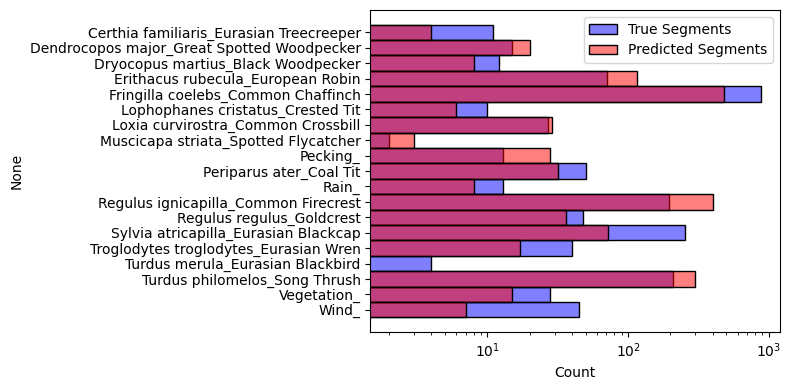

In [100]:
# Converti gli array in Series di pandas per contare le occorrenze
true_series = pd.Series(true_array)
pred_series = pd.Series(pred_array)

# Conta le occorrenze e crea DataFrame
true_counts = true_series.value_counts().sort_index()
pred_counts = pred_series.value_counts().sort_index()

# Unisci i due DataFrame per avere tutte le categorie
all_categories = pd.concat([true_counts, pred_counts], axis=1, sort=True).fillna(0)
all_categories.columns = ['True Segments', 'Predicted Segments']

# Crea il grafico orizzontale
plt.figure(figsize=(8, 4))  # Aumenta la larghezza per le etichette
sns.histplot(data=all_categories, y=all_categories.index, weights='True Segments', alpha=0.5, color='blue', label='True Segments', discrete=True, orientation='horizontal')
sns.histplot(data=all_categories, y=all_categories.index, weights='Predicted Segments', alpha=0.5, color='red', label='Predicted Segments', discrete=True, orientation='horizontal')

plt.xscale('log')  # Scala logaritmica sull'asse x
plt.legend()
plt.tight_layout()
plt.show()

### auc roc

In [101]:
y_pred_conf = []

for audio in test_pred_segments:
    scores_pred = []
    for segm, predictions in complete_pred_segments[audio].items():
        segm_conf_score = np.zeros(len(mlb.classes_))  # Vettore inizializzato a 0 per tutte le classi

        for pred, conf in predictions.items():
            binary_vector = mlb.transform([[pred]])[0]  # Convertiamo in binario (shape: (n_classes,))
            segm_conf_score += binary_vector * conf  # Moltiplichiamo per il confidence score

        scores_pred.append(segm_conf_score)  # Ogni segmento ora ha un array della stessa lunghezza di n_classes
    
    y_pred_conf.append(np.array(scores_pred))  # Lista di array uniformi

# Convertiamo in un array 2D
y_pred_conf = np.vstack(y_pred_conf)

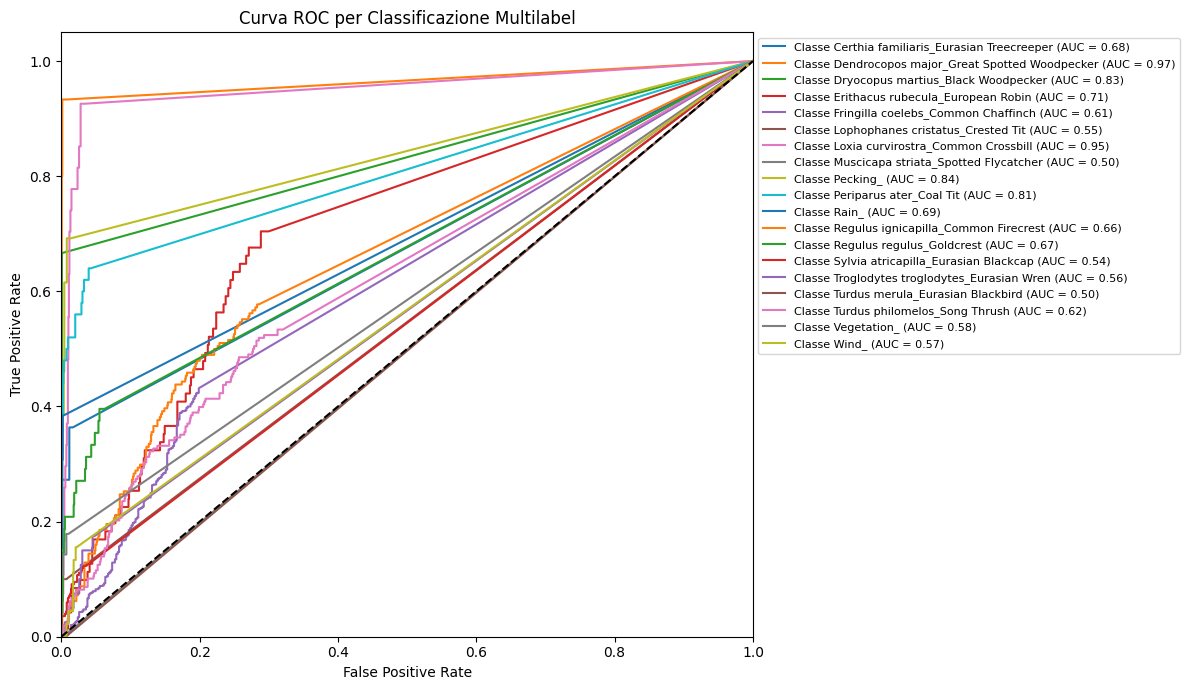

In [102]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 7))  # Aumenta la dimensione
n_classes = len(mlb.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_conf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {mlb.classes_[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC per Classificazione Multilabel')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)
plt.tight_layout()
plt.show()

In [103]:
roc_data = {}

n_classes = len(mlb.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_conf[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Salviamo i dati in un dizionario
    roc_data[mlb.classes_[i]] = {
        "fpr": fpr.tolist(),  # Converti in lista per compatibilità JSON
        "tpr": tpr.tolist(),
        "auc": roc_auc
    }
    
with open(f"classifiers/official/{model_name}/roc_auc.json", "w") as f:
    json.dump(roc_data, f)